In [150]:
import tensorflow as tf
import pandas as pd 
import os 
import numpy as np 


In [163]:
df = pd.read_csv('climate_2009_2016.csv')
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [164]:
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [165]:
df.index = pd.to_datetime(df['Date Time'], format = '%d.%m.%Y %H:%M:%S')
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


<Axes: xlabel='Date Time'>

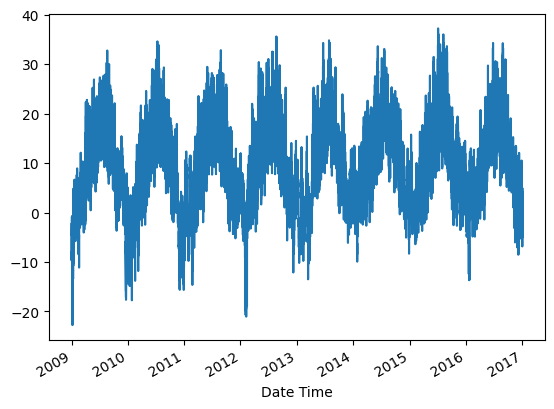

In [155]:
temp = df['T (degC)']
temp.plot()

In [156]:

def df_to_x_y(df,window_size = 5):
    df_as_np = df.to_numpy()
    x = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        x.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(x), np.array(y)
    
    

In [157]:
window_size = 5
x, y = df_to_x_y(temp,window_size)
x.shape,y.shape

((70086, 5, 1), (70086,))

In [158]:
x[0]

array([[-8.05],
       [-8.88],
       [-8.81],
       [-9.05],
       [-9.63]])

In [159]:
y

array([-9.67, -9.17, -8.1 , ..., -2.75, -2.89, -3.93])

In [160]:
x_train,y_train = x[:61000] , y[:61000]
x_val,y_val = x[61000:66000] , y[61000:66000]
x_test,y_test = x[61000:] , y[61000:]

In [161]:
x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape

((61000, 5, 1), (61000,), (5000, 5, 1), (5000,), (9086, 5, 1), (9086,))

In [162]:
x_train

array([[[-8.05],
        [-8.88],
        [-8.81],
        [-9.05],
        [-9.63]],

       [[-8.88],
        [-8.81],
        [-9.05],
        [-9.63],
        [-9.67]],

       [[-8.81],
        [-9.05],
        [-9.63],
        [-9.67],
        [-9.17]],

       ...,

       [[ 3.23],
        [ 3.63],
        [ 3.83],
        [ 4.13],
        [ 4.42]],

       [[ 3.63],
        [ 3.83],
        [ 4.13],
        [ 4.42],
        [ 3.99]],

       [[ 3.83],
        [ 4.13],
        [ 4.42],
        [ 3.99],
        [ 3.95]]])

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [87]:
model = Sequential()
model.add(InputLayer((5,1)))
model.add(LSTM(64))
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
file = ModelCheckpoint('model/best_model.keras', save_best_only=True)                       

model.compile(loss = MeanSquaredError(),optimizer = Adam(learning_rate =0.0001),metrics = [RootMeanSquaredError()])
model.fit(x_train,y_train, epochs = 10,callbacks= [file])

Epoch 1/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 83.6446 - root_mean_squared_error: 8.9300
Epoch 2/10
  22/1907 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 6.9252 - root_mean_squared_error: 2.6230  

/home/gupta/.local/pipx/venvs/jupyterlab/lib/python3.11/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


1907/1907 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 3.1549 - root_mean_squared_error: 1.7645
Epoch 3/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 1.0251 - root_mean_squared_error: 1.0119
Epoch 4/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.7419 - root_mean_squared_error: 0.8612
Epoch 5/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.6834 - root_mean_squared_error: 0.8266
Epoch 6/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.6711 - root_mean_squared_error: 0.8192
Epoch 7/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.6537 - root_mean_squared_error: 0.8085
Epoch 8/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.6411 - root_mean_squared_error: 0.8007
Epoch 9/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.6512 - root_mean_squared_error: 0.8069
Epoch 10/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.6419 - root_mean_squared_error: 0.8012


In [17]:
from tensorflow.keras.models import load_model
model = load_model('model/best_model.keras')


In [18]:
train_Predict = model.predict(x_train).flatten()
train_Predict.shape

1907/1907 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


(61000,)

In [19]:
y_test.shape

(9086,)

In [20]:
train_result = pd.DataFrame(data = {'train_Prediction':train_Predict,'Actual_values' : y_train})
train_result

,train_Prediction,Actual_values
0,-9.863770,-9.67
1,-9.665549,-9.17
2,-8.709486,-8.10
3,-7.174255,-7.66
4,-7.065178,-7.04
...,...,...
60995,4.082214,4.13
60996,4.367373,4.42
60997,4.667395,3.99
60998,3.844116,3.95


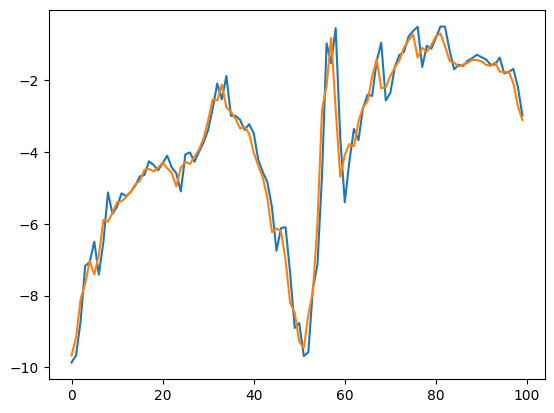

In [21]:
import matplotlib.pyplot as plt 
plt.plot(train_result['train_Prediction'][:100])
plt.plot(train_result['Actual_values'][:100])

In [22]:
val_predict = model.predict(x_val).flatten()
val_results = pd.DataFrame(data = {'val_prediction' : val_predict ,'Actual_val' : y_val})
val_results

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,val_prediction,Actual_val
0,4.482033,4.32
1,4.508854,4.71
2,4.999422,5.22
3,5.630950,5.92
4,6.455311,6.89
...,...,...
4995,28.079077,28.50
4996,28.058407,29.47
4997,29.262678,29.83
4998,29.422762,29.51


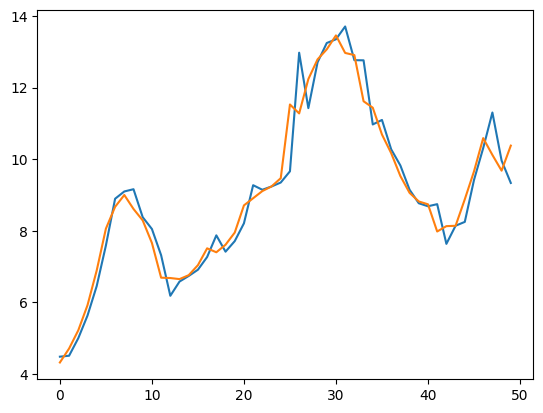

In [23]:
plt.plot(val_results['val_prediction'][:50])
plt.plot(val_results['Actual_val'][:50])

In [30]:
test_predict = model.predict(x_test).flatten()
test_predict.shape
y_test.shape

284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(9086,)

In [32]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, test_predict)
r2

0.991304138497236

In [34]:
test_result = pd.DataFrame(data = {'test_Prediction':test_predict,'Actual_values' : y_test})
test_result

,test_Prediction,Actual_values
0,4.482033,4.32
1,4.508854,4.71
2,4.999422,5.22
3,5.630950,5.92
4,6.455311,6.89
...,...,...
9081,-1.165240,-0.98
9082,-1.445863,-1.40
9083,-1.727790,-2.75
9084,-3.156058,-2.89


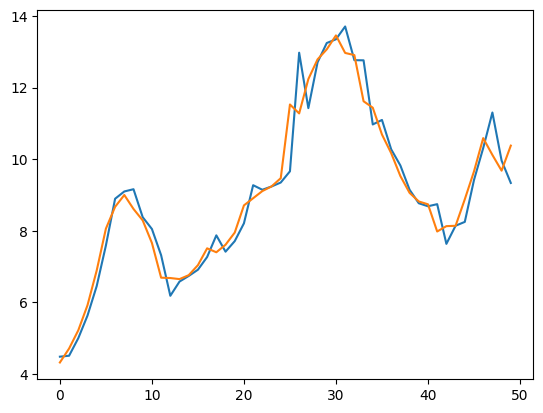

In [35]:
plt.plot(test_result['test_Prediction'][:50])
plt.plot(test_result['Actual_values'][:50])


In [36]:
from sklearn.metrics import mean_squared_error as mse

def plot_prediction(df,x,y,start = 0,end = 100):
    prediction = model.predict(x).flatten()
    df = pd.DataFrame(data = {'predictions' : prediction, 'ActualV' : y})
    plt.plot(df['predictions'][start:end])
    plt.plot(df['ActualV'][start:end])
    return df,mse(y,prediction)
                      
    

284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(      predictions  ActualV
 0        4.482033     4.32
 1        4.508854     4.71
 2        4.999422     5.22
 3        5.630950     5.92
 4        6.455311     6.89
 ...           ...      ...
 9081    -1.165240    -0.98
 9082    -1.445863    -1.40
 9083    -1.727790    -2.75
 9084    -3.156058    -2.89
 9085    -3.130645    -3.93
 
 [9086 rows x 2 columns],
 0.5712119775066998)

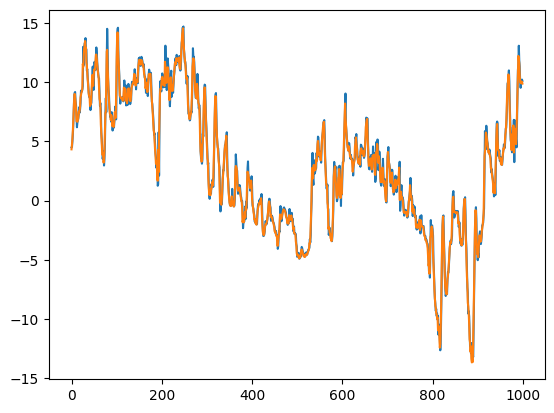

In [37]:
plot_prediction(model, x_test, y_test,0,1000)

# Applying the second model CNN

In [67]:
model_2 = Sequential()
model_2.add(InputLayer((5, 1)))
model_2.add(Conv1D(128, kernel_size=2))
model_2.add(Flatten())
model_2.add(Dense(8, 'relu'))
model_2.add(Dense(1, 'linear'))

model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 4, 128)         │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │         4,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,497 (17.57 KB)

 Trainable params: 4,497 (17.57 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
cp2 = ModelCheckpoint('model_2/best_model.keras', save_best_only=True)
model_2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [69]:
model_2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=[cp2])

Epoch 1/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 2s 969us/step - loss: 8.4686 - root_mean_squared_error: 2.6663 - val_loss: 0.8974 - val_root_mean_squared_error: 0.9473
Epoch 2/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - loss: 0.8716 - root_mean_squared_error: 0.9331 - val_loss: 0.6364 - val_root_mean_squared_error: 0.7978
Epoch 3/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 2s 807us/step - loss: 0.7112 - root_mean_squared_error: 0.8431 - val_loss: 0.6918 - val_root_mean_squared_error: 0.8317
Epoch 4/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - loss: 0.6640 - root_mean_squared_error: 0.8148 - val_loss: 0.6593 - val_root_mean_squared_error: 0.8120
Epoch 5/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - loss: 0.6598 - root_mean_squared_error: 0.8122 - val_loss: 0.6012 - val_root_mean_squared_error: 0.7754
Epoch 6/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step - loss: 0.6586 - root_mean_squared_error: 0.8115 - val_loss: 0.5966 - val_root_mean_squared_error: 0.7724
Epoch 7/10
1907/1907 ━━━━━━━

In [70]:
model_3 = Sequential()
model_3.add(InputLayer((5, 1)))
model_3.add(GRU(64))
model_3.add(Dense(8, 'relu'))
model_3.add(Dense(1, 'linear'))
model_3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,393 (52.32 KB)

 Trainable params: 13,393 (52.32 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
cp3 = ModelCheckpoint('model_3/best_model.keras',save_best_only = True)
model_3.compile(loss = MeanSquaredError(),optimizer = Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])


In [72]:
model_3.fit(x_train,y_train,validation_data= (x_val,y_val),epochs = 10,callbacks = [cp3] )

Epoch 1/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 76.0823 - root_mean_squared_error: 8.5288 - val_loss: 3.0254 - val_root_mean_squared_error: 1.7394
Epoch 2/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.9195 - root_mean_squared_error: 1.7023 - val_loss: 0.9204 - val_root_mean_squared_error: 0.9594
Epoch 3/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0639 - root_mean_squared_error: 1.0303 - val_loss: 0.6828 - val_root_mean_squared_error: 0.8263
Epoch 4/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7300 - root_mean_squared_error: 0.8543 - val_loss: 0.6066 - val_root_mean_squared_error: 0.7788
Epoch 5/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6654 - root_mean_squared_error: 0.8156 - val_loss: 0.6056 - val_root_mean_squared_error: 0.7782
Epoch 6/10
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6548 - root_mean_squared_error: 0.8091 - val_loss: 0.6019 - val_root_mean_squared_error: 0.7758
Epoch 7/10
1907/1907 ━━━━━━━━━━━━━━━━━━

# Predicting the temp from multiple input value 
inintially we have multiple row but now we have multiple column 6 row as window size and 5 column  

In [132]:
df_temp = pd.DataFrame({'temprature' : temp})
df_temp['second'] = df_temp.index.map(pd.Timestamp.timestamp)
df_temp

,temprature,second
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [133]:
sec_day = 60*60*24
sec_year = sec_day * 365.2425

df_temp['day_sin'] = np.sin(df_temp['second'] * 2*np.pi/sec_day)
df_temp['day_cos'] = np.cos(df_temp['second'] * 2* np.pi/sec_day)
df_temp['year_sin'] = np.sin(df_temp['second'] * 2*np.pi/sec_year)
df_temp['year_cos'] = np.cos(df_temp['second'] * 2*np.pi/sec_year)

In [134]:
df_temp.head()

,temprature,second,day_sin,day_cos,year_sin,year_cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917


In [135]:
df_temp = df_temp.drop('second',axis = 1)
df_temp.head()

,temprature,day_sin,day_cos,year_sin,year_cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [136]:
def df_x_y(df,window_size):
    x = []
    y = []
    df_np = df.to_numpy()
    for i in range(len(df_np) - window_size):
        row = [r for r in df_np[i :i + window_size]]
        x.append(row)
        labels = df_np[i + window_size][0]
        y.append(labels)
    return np.array(x) , np.array(y)

In [137]:
x1, y1 = df_x_y(df_temp,6)
x1.shape, y1.shape

((70085, 6, 5), (70085,))

In [138]:
x1[0]

array([[-8.05000000e+00,  2.58819045e-01,  9.65925826e-01,
         1.00491198e-02,  9.99949506e-01],
       [-8.88000000e+00,  5.00000000e-01,  8.66025404e-01,
         1.07658633e-02,  9.99942046e-01],
       [-8.81000000e+00,  7.07106781e-01,  7.07106781e-01,
         1.14826014e-02,  9.99934073e-01],
       [-9.05000000e+00,  8.66025404e-01,  5.00000000e-01,
         1.21993335e-02,  9.99925585e-01],
       [-9.63000000e+00,  9.65925826e-01,  2.58819045e-01,
         1.29160593e-02,  9.99916584e-01],
       [-9.67000000e+00,  1.00000000e+00,  4.33995489e-12,
         1.36327785e-02,  9.99907069e-01]])

In [139]:
y1[0]

-9.17

In [140]:
x_train,y_train = x1[:60000],y1[:60000]
x_val,y_val = x1[60000:65000],y1[60000:65000]
x_test, y_test = x1[65000:],y1[65000:]

In [141]:
x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [142]:
x_test

array([[[ 1.82700000e+01, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 1.78500000e+01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 1.66500000e+01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 1.58500000e+01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 1.50900000e+01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 1.39900000e+01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 1.78500000e+01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 1.66500000e+01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 1.58500000e+01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 1.50900000e+01, -2.58819045e-01,  9.65925826e-01,
  

In [143]:
x_train_mean = np.mean(x_train[:,:,0])
x_train_std = np.mean(x_train[:,:,0])


In [144]:
# now we take standard deviation to make value small for preprocessing
def scaling_value1(x):
    x[:,:,0] = (x[:,:,0] - x_train_mean) / x_train_std
    return x;

def scaling_value2(y):
    y = (y - x_train_mean) / x_train_std
    return y;

In [145]:
scaling_value1(x_train)
scaling_value1(x_val)
scaling_value1(x_test)

# scaling_value2(y_train)
# scaling_value2(y_val)
# scaling_value2(y_test)

array([[[ 9.39352789e-01, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 8.94769966e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 7.67390473e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 6.82470810e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.01797131e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 4.85032595e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 8.94769966e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 7.67390473e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 6.82470810e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.01797131e-01, -2.58819045e-01,  9.65925826e-01,
  

In [146]:
model_4 = Sequential()
model_4.add(InputLayer((6, 5)))
model_4.add(LSTM(128))
model_4.add(Dense(16, 'relu'))
model_4.add(Dense(1, 'linear'))

model_4.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 128)            │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,689 (276.13 KB)

 Trainable params: 70,689 (276.13 KB)

 Non-trainable params: 0 (0.00 B)

In [147]:
cp4 = ModelCheckpoint('model_4/best_model.keras',save_best_only = True)
model_4.compile(loss = MeanSquaredError() , optimizer = Adam(learning_rate = 0.0001),metrics = [MeanSquaredError()])


In [148]:
model_4.fit(x_train,y_train,validation_data = (x_val,y_val),epochs = 10,callbacks = [cp4])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - loss: 53.0806 - mean_squared_error: 53.0806 - val_loss: 3.3351 - val_mean_squared_error: 3.3220
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 3.7289 - mean_squared_error: 3.7289 - val_loss: 1.7641 - val_mean_squared_error: 1.7576
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 1.6484 - mean_squared_error: 1.6484 - val_loss: 0.8867 - val_mean_squared_error: 0.8874
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.9499 - mean_squared_error: 0.9499 - val_loss: 0.6046 - val_mean_squared_error: 0.6056
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.7022 - mean_squared_error: 0.7022 - val_loss: 0.4775 - val_mean_squared_error: 0.4797
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.5892 - mean_squared_error: 0.5892 - val_loss: 0.4779 - val_mean_squared_error: 0.4816
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.5470 - mean_squared_error: 

In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

def plot_prediction1(df,x,y,start ,end):
    predicted_val = model_4.predict(x).flatten()
    df = pd.DataFrame(data = {'prediction' : predicted_val,'Actual_val': y})
    plt.plot(df['prediction'][start:end])
    plt.plot(df['Actual_val'][start:end])
    r2 = r2_score(predicted_val,y)
    return df,mse(y,predicted_val),r2


159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


(      prediction  Actual_val
 0      11.761207       13.46
 1      11.202532       12.93
 2      10.815830       12.43
 3      10.661036       12.17
 4      10.809525       11.55
 ...          ...         ...
 5080    0.491560       -0.98
 5081    0.348139       -1.40
 5082    0.266843       -2.75
 5083    0.223707       -2.89
 5084    0.188188       -3.93
 
 [5085 rows x 2 columns],
 16.016747562853567,
 0.6703866801350817)

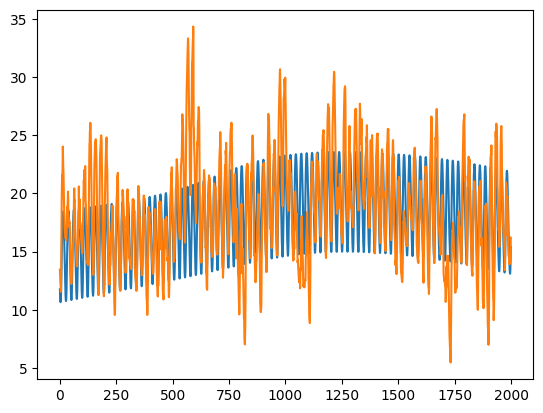

In [131]:
plot_prediction1(model_4,x_test,y_test,0,2000)

In [356]:
def after_scaling_temp(nums):
    nums  = (nums* x_train_std) + x_train_mean
    return nums

In [357]:
import matplotlib.pyplot as plt
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  temp_preds =  after_scaling_temp(predictions)
  temp_actuals = after_scaling_temp(y)
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                         
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  
  return df[start:end]


159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Temperature Predictions,Temperature Actuals
0,137.496307,136.222869
1,133.195969,131.229914
2,128.852325,126.519580
3,125.675179,124.070206
4,126.957748,118.229391
...,...,...
1995,140.826035,142.723130
1996,145.279251,141.969476
1997,147.487427,145.643537
1998,156.081192,146.585604


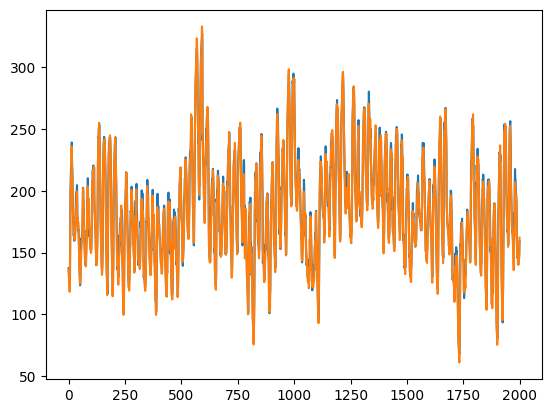

In [358]:
after_process = plot_predictions2(model_4,x_test,y_test,0,2000)
after_process